# 🌿 Phase 2, Week 5: Photosynthesis (Exciton Transfer) 🌿

Photosynthesis is the process by which plants, algae, and some bacteria convert light energy into chemical energy, creating sugars and oxygen. It's incredibly efficient, and recent research suggests that quantum mechanics helps achieve this efficiency.

### What is Exciton Transfer in Photosynthesis?

When a chlorophyll molecule (the green pigment in plants) absorbs a photon of sunlight, it gets "excited." This excited state isn't a stable form for energy storage; it's like a hot potato. This absorbed energy, in the form of an **exciton**, needs to be quickly and efficiently transferred to a reaction center where it can be converted into chemical energy.

The fascinating part is how this energy transfer happens. It's not just a simple classical "bumping" of energy from one molecule to the next. Instead, it involves quantum mechanical phenomena, particularly **exciton transfer**.

### Key Quantum Concepts in Photosynthesis:

1.  **Exciton:**
    * An exciton is not a physical particle that moves; rather, it's a quantum of energy (an excited state) that can "hop" or "delocalize" across multiple molecules.
    * When a chlorophyll molecule absorbs light, its electrons jump to a higher energy level. This excited state, an exciton, can then move through a network of other chlorophyll molecules.

2.  **Quantum Coherence:**
    * This is where it gets really interesting! Quantum coherence means that a quantum particle (like an exciton) can exist in a "superposition" of states, meaning it can effectively be in multiple places at once or take multiple paths simultaneously.
    * In photosynthesis, it's proposed that excitons maintain a state of quantum coherence, allowing them to explore multiple energy transfer pathways simultaneously and choose the most efficient one to the reaction center. This leads to extremely fast and efficient energy transfer, minimizing energy loss. It's like the exciton takes all possible routes at once and picks the fastest one!
    * Without coherence, the exciton would have to "choose" one path randomly, which would be slower and less efficient.

3.  **Resonance Energy Transfer (Förster Resonance Energy Transfer - FRET):**
    * While FRET is a classical model, it has quantum underpinnings. It describes how energy can be non-radiatively transferred between two chromophores (light-absorbing molecules) when their electronic excited states overlap.
    * In photosynthesis, excitons can transfer from one chlorophyll molecule to a nearby one if their energy levels are aligned, even without direct contact. This is a primary mechanism for energy funneling towards the reaction center.

4.  **Vibrational Assistance:**
    * The surrounding protein environment and molecular vibrations (phonons) can play a role in maintaining or breaking coherence.
    * Some theories suggest that these vibrations might even assist in guiding the exciton to the reaction center by "shaking" the system in a way that helps it find the optimal path, acting as a "quantum assist."

### Role in Photosynthesis Efficiency:

The idea is that these quantum effects (especially coherence) allow the exciton to rapidly and efficiently find the reaction center, minimizing energy loss as heat. This is crucial because light is constantly fluctuating, and the plant needs to capture and convert every bit of available energy. If the energy transfer were purely classical, much more energy would be lost, making photosynthesis far less effective.

Next, we'll look at a simplified quantum model that demonstrates how an exciton might transfer between two coupled "molecules" to see these principles in action.

In [7]:
# This Python code will provide a simplified model to demonstrate how energy (excitons) can transfer efficiently between molecules, 
# a process vital in the initial stages of photosynthesis. We'll use the QuTiP library to simulate the quantum dynamics.

import numpy as np
import matplotlib.pyplot as plt
from qutip import Qobj, ket, mesolve, basis, qeye, destroy, tensor

Hamiltonian H: 
 Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.  0.  0.  0. ]
 [0.  0.9 0.1 0. ]
 [0.  0.1 1.  0. ]
 [0.  0.  0.  0. ]]
---------------------------------------


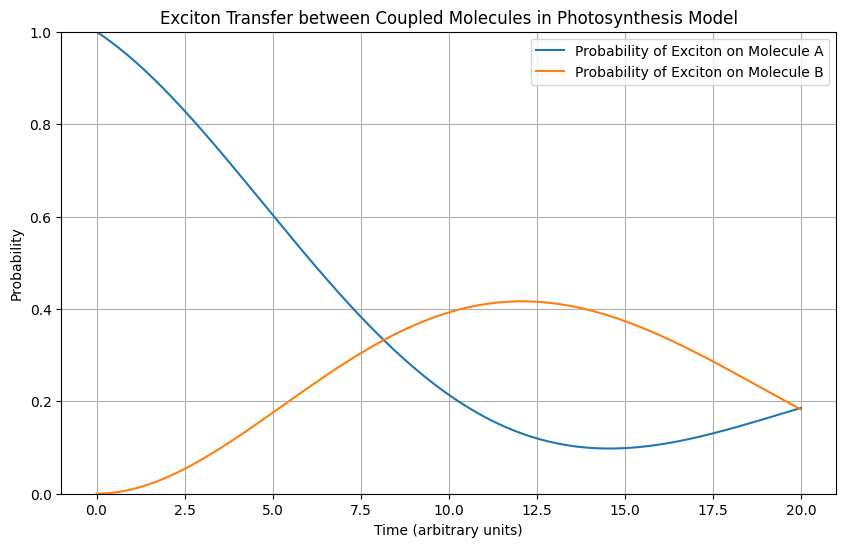


Simulation complete. The plot shows the probability of finding the exciton
on Molecule A (initially excited) and Molecule B over time. You should observe
the exciton probability oscillating and then decaying due to the damping.
The efficiency of transfer depends on the coupling strength (J) and damping (gamma).


In [25]:
# --- 1. Define System Parameters ---
# We'll consider a simplified system of two coupled molecules (like chlorophylls)
# Each molecule has a ground state |g> and an excited state |e>
# When light hits, one molecule gets excited, forming an 'exciton'
# We want to see how this exciton moves between the two molecules.

# Energy of the excited state for each molecule (relative to ground state)
# Let's say Molecule A is slightly higher in energy than Molecule B
E_A = 1.0  # Energy of excited state of Molecule A
E_B = 0.9  # Energy of excited state of Molecule B

# Coupling strength between the two molecules
# This represents how easily the exciton can "hop" from one molecule to another
J = 0.1 # Coupling strength (tunneling rate or hopping integral)

# Damping/Decoherence (how quickly energy is lost to the environment)
# This simulates the environment interacting with the system

gamma = 0.05  # Decay rate (e.g., due to interaction with phonons/vibrations)

# Simulation time
t_max = 20 # Maximum time for simulation
num_points = 500
tlist = np.linspace(0, t_max, num_points)

# --- 2. Define Quantum Operators and States ---

# Basis states for a single molecule: |g> (ground), |e> (excited)
g = basis(2, 0)
e = basis(2, 1)

# Operators for molecules A and B
# We use tensor products to combine single-molecule states/operators

# Identity operator for single qubit
I_q = qeye(2)

# Excited state on molecule A, ground on B: |e_A, g_B>
eA_gB = tensor(e, g) # Equivalent to |10> for the system

# Ground state on molecule A, excited on B: |g_A, e_B>
gA_eB = tensor(g, e) # Equivalent to |01> for the system

# --- 3. Define the Hamiltonian (H) ---
# The Hamiltonian describes the total energy of the system and how it evolves.
# H = H_0 + H_init + H_diss (H_diss will he handled by collapse operators)

# H_0: Individual energies of excited states
# If molecule A is excited and B is ground: E_A * |e_A g_B>e_A g_B|
# If molecule B is excited and A is ground: E_B * |g_A e_B<g_A e_B|
H_0 =  E_A * eA_gB * eA_gB.dag() + E_B * gA_eB * gA_eB.dag()

# H_init: Coupling between molecules (excition hopping)
# J * (|e_A g_B><g_A e_B| + |g_A e_B><e_A g_B|)
# This allows excition to swap between A and B
H_coupling = J * (eA_gB * gA_eB.dag() + gA_eB * eA_gB.dag())

# Total Hamiltonian (ignoring dissipation for now, handled by collapse operators)
H = H_0 + H_coupling

print("Hamiltonian H: \n", H)

# --- 4. Define Initial State and Collapse operators ---

# Initial State: Assume molecule A absorbs light and gets excited
psi0 = eA_gB # Initial state |e_A, g_B> (Molecule A excited, B ground)

# Collapse operators for dissipation/decoherence
# We model spontaneous decay from the excited state of each molecule 
# sigma - operator for molecule A: |g_A><e_A| (lowers state from e to g)
sm_A = tensor(destroy(2), I_q)  # Lowering operator on qubit 0, identity on qubit 1
#sigma- operator for molecule B: |g_B><e_B| (lowers state from e to g)
sm_B = tensor(I_q, destroy(2))  # Identity on qubit 0, lowering operator on qubit 1

# list of collapse operators (c_ops)
# Each of c_op is sqrt(gamma) * lowering_operator
c_ops = [np.sqrt(gamma) * sm_A, np.sqrt(gamma) * sm_B]

# --- 5. Evolve the system in Time ---
# We use mesolve (Master Equation Solver) to evovle the density matrix
# the density matrix allows us to track the probabilites and coherence
# We want to track the probability of finding the excition on molecule A or B.
# These are the expectation values of the projectors 
# P_A = |e_A g_B><e_A g_B| (Probability of exciton on A)
# P_B = |g_A e_B><g_A e_B| (Probability of exciton on B)

# P_A = |e_A g_B><e_A g_B| (Probability of exciton on A)
# Build projectors for individual qubits first:
proj_e_A = e * e.dag() # Projector onto excited state for qubit A
proj_g_B = g * g.dag() # Projector onto ground state for qubit B
P_A = tensor(proj_e_A, proj_g_B) # Combined projector for state |e_A g_B>

# P_B = |g_A e_B><g_A e_B| (Probability of exciton on B)
# Build projectors for individual qubits first:
proj_g_A = g * g.dag() # Projector onto ground state for qubit A
proj_e_B = e * e.dag() # Projector onto excited state for qubit B
P_B = tensor(proj_g_A, proj_e_B) # Combined projector for state |g_A e_B>

e_ops = [P_A, P_B] # List of expectation operators

print("---------------------------------------")

# Solve the master equation 
output = mesolve(H, psi0, tlist, c_ops, e_ops)

#  Extract probabilities
prob_A = output.expect[0] # Probability of exciton on Molecule A
prob_B = output.expect[1] # Probability of exciton on Molecule B

# --- 6. Plotting the Results ---
plt.figure(figsize=(10, 6))
plt.plot(tlist, prob_A, label='Probability of Exciton on Molecule A')
plt.plot(tlist, prob_B, label='Probability of Exciton on Molecule B')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Probability')
plt.title('Exciton Transfer between Coupled Molecules in Photosynthesis Model')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.show()

print("\nSimulation complete. The plot shows the probability of finding the exciton")
print("on Molecule A (initially excited) and Molecule B over time. You should observe")
print("the exciton probability oscillating and then decaying due to the damping.")
print("The efficiency of transfer depends on the coupling strength (J) and damping (gamma).")



Hamiltonian H: 
 Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.8  0.12 0.   0.   0.   0.   0.  ]
 [0.   0.12 0.9  0.   0.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.1  0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]]
--- Debugging QuTiP Object Dimensions (3-site) ---
Dimensions of H (Hamiltonian): [[2, 2, 2], [2, 2, 2]]
Dimensions of psi0 (Initial State): [[2, 2, 2], [1, 1, 1]]
Dimensions of c_ops[0] (Collapse Operator): [[2, 2, 2], [2, 2, 2]]
Dimensions of c_ops[1] (Collapse Operator): [[2, 2, 2], [2, 2, 2]]
Dimensions of c_ops[2] (Collapse Operator): [[2, 2, 2], [2, 2, 2]]
Dimensions of e_ops[0] (Expectation Operator): [[2, 2, 2], [2, 2, 2]]
Dimensions of e_ops[1] (Expectation Operator): [[2, 2, 2], [2, 2, 2]]
Dimensions of e_ops[2] (

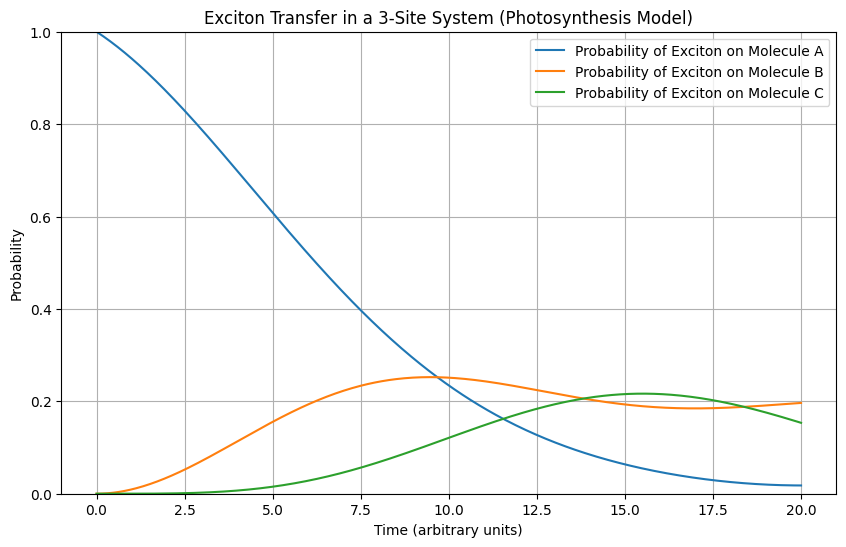


Simulation complete. The plot shows the probability of finding the exciton
on Molecule A, B, or C over time in a 3-site system. You should observe
the exciton moving between sites (oscillating) and eventually decaying.
The exciton tends to move towards lower energy sites (if coupled) and eventually decays.


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import Qobj, ket, mesolve, basis, qeye, destroy, tensor

# --- 1. Define System Parameters ---
# Now, we have three coupled molecules (A, B, C)
E_A = 1.0  # Energy of excited state of Molecule A
E_B = 0.9  # Energy of excited state of Molecule B
E_C = 0.8  # NEW: Energy of excited state of Molecule C (even lower, creating a 'downhill' path)

# Coupling strengths between connected molecules
# We'll assume coupling only between A-B and B-C (nearest-neighbor hopping)
J_AB = 0.1  # Coupling strength between A and B
J_BC = 0.12 # NEW: Coupling strength between B and C (slightly stronger)
# J_AC = 0.0 # We can set this to 0 if A and C don't directly couple

gamma = 0.05  # Decay rate (energy leak to environment)

t_max = 20 # Maximum time for simulation
num_points = 500
tlist = np.linspace(0, t_max, num_points)

# --- 2. Define Quantum Operators and States ---
# Basis states for a single molecule: |g> (ground), |e> (excited)
g = basis(2, 0) # |0>
e = basis(2, 1) # |1>

# Identity operator for a single molecule
I_q = qeye(2)

# Now we need states for a 3-molecule system!
# We use tensor three times: (Molecule A, Molecule B, Molecule C)

# Exciton on Molecule A, others ground: |e_A g_B g_C>
eA_gB_gC = tensor(e, g, g)

# Exciton on Molecule B, others ground: |g_A e_B g_C>
gA_eB_gC = tensor(g, e, g)

# Exciton on Molecule C, others ground: |g_A g_B e_C>
gA_gB_eC = tensor(g, g, e)

# --- 3. Define the Hamiltonian (H) ---
# H = H_0 (individual energies) + H_coupling (hopping between molecules)

# H_0: Individual energies of excited states for A, B, and C
H0 = (E_A * eA_gB_gC * eA_gB_gC.dag() +
      E_B * gA_eB_gC * gA_eB_gC.dag() +
      E_C * gA_gB_eC * gA_gB_eC.dag()) # NEW: added E_C term

# H_coupling: Hopping between molecules (A-B and B-C)
# Hopping A <-> B
H_coupling_AB = J_AB * (eA_gB_gC * gA_eB_gC.dag() + gA_eB_gC * eA_gB_gC.dag())

# NEW: Hopping B <-> C
H_coupling_BC = J_BC * (gA_eB_gC * gA_gB_eC.dag() + gA_gB_eC * gA_eB_gC.dag())

# If there was direct A <-> C coupling:
# H_coupling_AC = J_AC * (eA_gB_gC * gA_gB_eC.dag() + gA_gB_eC * eA_gB_gC.dag())
# And add it to total H_coupling

H_coupling = H_coupling_AB + H_coupling_BC # NEW: Summing up all coupling terms

# Total Hamiltonian
H = H0 + H_coupling

print("Hamiltonian H: \n", H)

# --- 4. Define Initial State and Collapse operators ---
# Start with exciton on Molecule A
psi0 = eA_gB_gC # Initial state |e_A, g_B, g_C>

# Collapse operators for each molecule
# sm_A: decay from A (destroy on 1st qubit, identity on 2nd & 3rd)
sm_A = tensor(destroy(2), I_q, I_q)
# sm_B: decay from B (identity on 1st, destroy on 2nd, identity on 3rd)
sm_B = tensor(I_q, destroy(2), I_q)
# NEW: sm_C: decay from C (identity on 1st & 2nd, destroy on 3rd)
sm_C = tensor(I_q, I_q, destroy(2))

# List of collapse operators
c_ops = [np.sqrt(gamma) * sm_A,
         np.sqrt(gamma) * sm_B,
         np.sqrt(gamma) * sm_C] # NEW: Added sm_C

# --- 5. Evolve the system in Time ---
# Expectation operators (projectors) for each molecule
# P_A = |e_A g_B g_C><e_A g_B g_C| (Probability of exciton on A)
P_A = tensor(e * e.dag(), g * g.dag(), g * g.dag())

# P_B = |g_A e_B g_C><g_A e_B g_C| (Probability of exciton on B)
P_B = tensor(g * g.dag(), e * e.dag(), g * g.dag())

# NEW: P_C = |g_A g_B e_C><g_A g_B e_C| (Probability of exciton on C)
P_C = tensor(g * g.dag(), g * g.dag(), e * e.dag())

e_ops = [P_A, P_B, P_C] # NEW: Added P_C

# --- Debugging QuTiP Object Dimensions ---
print("--- Debugging QuTiP Object Dimensions (3-site) ---")
print(f"Dimensions of H (Hamiltonian): {H.dims}")
print(f"Dimensions of psi0 (Initial State): {psi0.dims}")
if c_ops:
    for i, op in enumerate(c_ops):
        print(f"Dimensions of c_ops[{i}] (Collapse Operator): {op.dims}")
if e_ops:
    for i, op in enumerate(e_ops):
        print(f"Dimensions of e_ops[{i}] (Expectation Operator): {op.dims}")
print("---------------------------------------")


# Solve the master equation
output = mesolve(H, psi0, tlist, c_ops, e_ops)

# Extract probabilities
prob_A = output.expect[0] # Probability of exciton on Molecule A
prob_B = output.expect[1] # Probability of exciton on Molecule B
prob_C = output.expect[2] # NEW: Probability of exciton on Molecule C

# --- 6. Plotting the Results ---
plt.figure(figsize=(10, 6))
plt.plot(tlist, prob_A, label='Probability of Exciton on Molecule A')
plt.plot(tlist, prob_B, label='Probability of Exciton on Molecule B')
plt.plot(tlist, prob_C, label='Probability of Exciton on Molecule C') # NEW: Plotting prob_C

plt.xlabel('Time (arbitrary units)')
plt.ylabel('Probability')
plt.title('Exciton Transfer in a 3-Site System (Photosynthesis Model)')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.show()

print("\nSimulation complete. The plot shows the probability of finding the exciton")
print("on Molecule A, B, or C over time in a 3-site system. You should observe")
print("the exciton moving between sites (oscillating) and eventually decaying.")
print("The exciton tends to move towards lower energy sites (if coupled) and eventually decays.")